In [1]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib notebook
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar_time_series import time_series

%reload_ext autoreload

# Load Data

In [3]:
djia_df = pd.read_excel(r'E:\gitlab\dataset\time_series\DJIA_Jan2016_Dec2016.xlsx')

In [4]:
djia_df.head(10)

Date          Open          High           Low         Close  \
0 2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
1 2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2 2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
3 2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
4 2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   
5 2016-01-11  16358.709961  16461.849609  16232.030273  16398.570313   
6 2016-01-12  16419.109375  16591.349609  16322.070313  16516.220703   
7 2016-01-13  16526.630859  16593.509766  16123.200195  16151.410156   
8 2016-01-14  16159.009766  16482.050781  16075.120117  16379.049805   
9 2016-01-15  16354.330078  16354.330078  15842.110352  15988.080078   

      Adj Close     Volume  
0  17148.939453  148060000  
1  17158.660156  105750000  
2  16906.509766  120250000  
3  16514.099609  176240000  
4  16346.450195  141850000  
5  16398.570313  127790000  
6  16516.220703  117480000  
7  16151.410156  153530000  
8  16379.049805  158830000  
9  15988.080078  239210000

In [5]:
#Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [6]:
#Let us see first few rows of the modified DataFrame
djia_df.head(10)

Open          High           Low         Close  \
Date                                                                 
2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   
2016-01-11  16358.709961  16461.849609  16232.030273  16398.570313   
2016-01-12  16419.109375  16591.349609  16322.070313  16516.220703   
2016-01-13  16526.630859  16593.509766  16123.200195  16151.410156   
2016-01-14  16159.009766  16482.050781  16075.120117  16379.049805   
2016-01-15  16354.330078  16354.330078  15842.110352  15988.080078   

               Adj Close     Volume  
Date                                 
2016-01-04  17148.939453  148060000  
2016-01-05  17158.660156  105750000  
2016-01-06  16906.509766  120250000  
2016-01-07  16514.099609  176240000  
2016-01-08  16346.450195  141850000  
2016-01-11  16398.570313  127790000  
2016-01-12  16516.220703  117480000  
2016-01-13  16151.410156  153530000  
2016-01-14  16379.049805  158830000  
2016-01-15  15988.080078  239210000

In [7]:
#We would be using the 'Close' values of the DJIA to illustrate Differencing
first_order_diff = djia_df['Close'].diff(1)

<IPython.core.display.Javascript object>


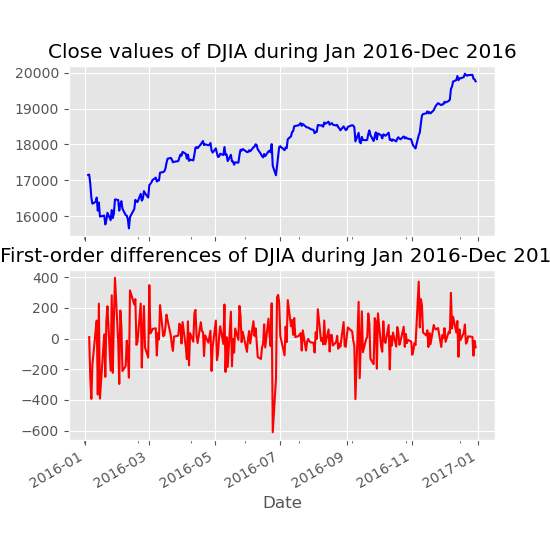

In [8]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')
#plt.savefig('plots/ch2/B07887_02_06.png', format='png', dpi=300)
plt.show()

A quick way to verify whether the first-order differencing has stationarized a time series is to plot the ACF function and run the Ljung-Box test for the differenced series. The LjungBox test determines if the observed auto-correlation is statistically significant. The null hypothesis of the Ljung-Box test is that the time series consist of random variations and lacks
predictable autocorrelation while the alternate hypothesis proposes that the observed autocorrelation is not random.

ACF is computed for different lags and verified by the Ljung-Box test. 

the following figure shows ACF of the DJIA close values and as well as for the time series of first-order differences. Notice that for the differenced series, ACF shows no predictable pattern and drops suddenly close to zero. Moreover, the p-value of the test being 0.894 for lag=10 makes us accept the null hypothesis of Ljung-Box test for the differenced series

<IPython.core.display.Javascript object>


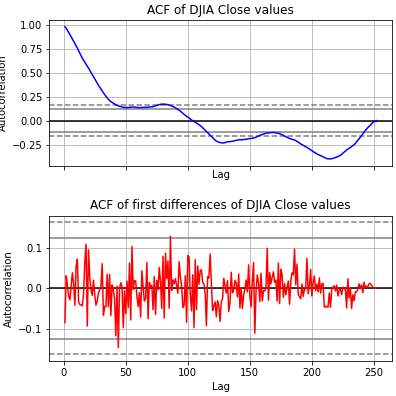

In [15]:
#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
test = autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
# plt.savefig('plots/ch2/B07887_02_07.png', format='png', dpi=300)
plt.show()

In [19]:
"""
Now we will perform the Ljung-Box test on the ACFs
of the original time series and the first-differences.
For running the test we will limit upto 20 lags
"""

'\nNow we will perform the Ljung-Box test on the ACFs\nof the original time series and the first-differences.\nFor running the test we will limit upto 20 lags\n'

In [12]:
time_series.ljungbox_test(djia_df,'Close',20,alpha=0.05)


Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 0 for p-val = 1.0693767753677146e-55

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 1 for p-val = 9.994326469628715e-107

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 2 for p-val = 3.514318635466978e-156

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 3 for p-val = 8.306783142365376e-204

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 4 for p-val = 1.3385232646531283e-249

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 5 for p-val = 1.1920943365344843e-293

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 6 for p-val =

In [22]:
"""
The above results show statistically significant ACF in the original DJIA Close values
"""

'\nThe above results show statistically significant ACF in the original DJIA Close values\n'

In [18]:
time_series.ljungbox_test(pd.DataFrame(first_order_diff.iloc[1:]),'Close',20,alpha=0.05)

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Null hypothesis is failed to reject at lag = 0 for p-val = 0.17569800898040236
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Null hypothesis is failed to reject at lag = 1 for p-val = 0.35383008530092375
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Null hypothesis is failed to reject at lag = 2 for p-val = 0.5531395640331853
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Null hypothesis is failed to reject at lag = 3 for p-val = 0.6985127807558777
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Null hypothesis is failed to reject at lag = 4 for p-val = 0.7891580120671385
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Null hypothesis is failed to reject at lag = 5 for p-val = 0.8772903282781713
Weak evidence against the null hypothesis
Fail to reject the null hy

In [16]:
"""
The above results show that ACF is essentially random in the differenced DJIA Close values
"""

'\nThe above results show that ACF is essentially random in the differenced DJIA Close values\n'